In [5]:
import numpy as np
from tensorflow import keras
from itertools import product
import matplotlib.pyplot as plt

X = np.array([*product([0,1], repeat=2)])                   # input vectors
y = np.array([[X[i][0] ^ X[i][1]] for i in range(len(X))])  # target values
print(X, y)                                                 # verify

[[0 0]
 [0 1]
 [1 0]
 [1 1]] [[0]
 [1]
 [1]
 [0]]


In [6]:

model = keras.Sequential([
    keras.layers.Dense(2, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])
# use callback to stop training when the loss is decreasing less than min_delta
# patience is neccessary here to avoid stopping at a local minimum of the loss function (see loss plot below)
# i.e. continue for 200 epochs when the loss stops decreasing to try reaching the global minimum
callbacks = [
    keras.callbacks.EarlyStopping(
        min_delta=0.0001,
        mode="min",
        monitor="loss",
        patience=200,
    ),
    keras.callbacks.ModelCheckpoint(    # save the optimal state of the model
        filepath="checkpoints/xor_gate.keras",
        monitor="loss",
        save_best_only=True,)
]
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss="mse", metrics="mae")
history = model.fit(X,y, epochs=8000, batch_size=4, verbose=0, callbacks=callbacks)

2022-11-05 14:34:18.971693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


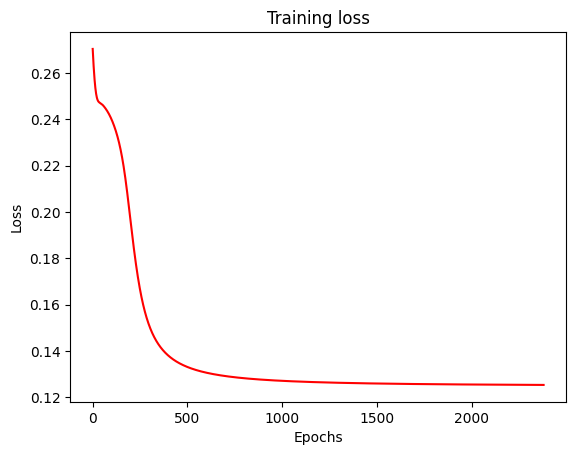

In [7]:
loss_values = history.history["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()      # (notice the local minimum at the beginning and the early stopping)

In [8]:
# explicit calculation of a forward pass (only the using weights from keras model)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# get weights and biases from keras layers
W0, B0 = model.layers[0].get_weights()
W1, B1 = model.layers[1].get_weights()

input = X[0]                                # X[0] = [0, 0]
layer_one_output = sigmoid(input @ W0 + B0) # the new @ operator does matrix multiplication
Z = layer_one_output @ W1 + B1
output = sigmoid(Z)
print(output)                               # verify output

[0.01872806]
